# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
caso = 'julieta'
df = df_caso(caso)
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time,curso
id,,,,,,,,,,,,,
11511,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Si estudiaste y sabes hacer los ejercicios ¿pa...,1,2021-05-19T02:23:09.528Z,2021.CD1100
11515,2702,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,5,No debería usar la información ya que no es co...,1,2021-05-19T02:49:39.214Z,2021.CD1100
11516,2701,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,4,si es que no sabe realizar la pregunta puede r...,1,2021-05-19T02:49:40.029Z,2021.CD1100
11517,2700,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,3,lamentablemente este pais es muy injusto y la ...,1,2021-05-19T02:53:11.462Z,2021.CD1100
11519,2707,NaN,M,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Considerando que Julieta pudo optar por una be...,1,2021-05-19T03:16:45.404Z,2021.CD1100


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

[Proporcione argumentos para justificar su respuesta]. En el último control realizado Julieta se ve en la posibilidad de copiar una respuesta que fue compartida en el grupo de WhatsApp de su sección. Julieta en esta situación a la que se ve enfrentada en el control debiera:
1	Usar la información del grupo de WhatsApp
6	No usar la información del grupo de WhatsApp


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('\nCantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id         0
team_id      4339
gender          0
df              0
title           0
opt_left        0
opt_right       0
max_num         0
sel             0
comment        34
phase           0
time            0
curso           0
dtype: int64


Cantidad de valores únicos por columna:


user_id       819
team_id       247
gender          3
df              1
title          21
opt_left        2
opt_right       2
max_num         2
sel             7
comment      5004
phase           6
time         5095
curso           1
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 5061


## Exploración básica del texto

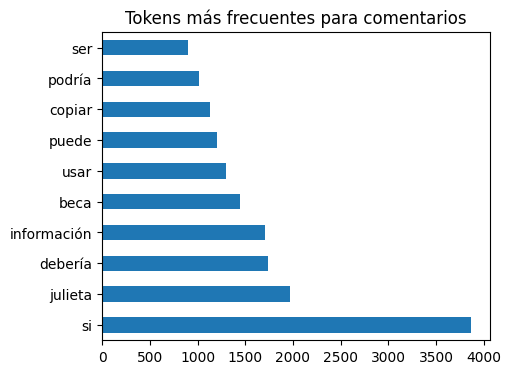

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

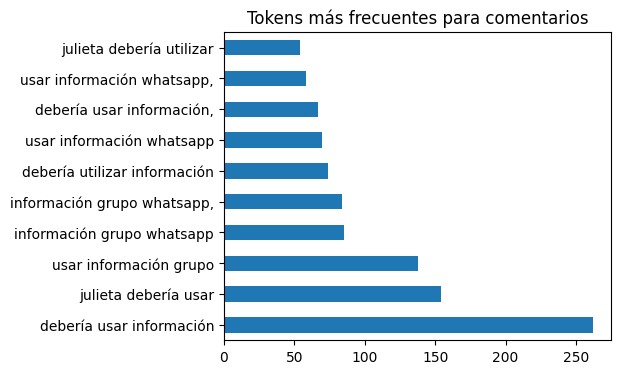

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

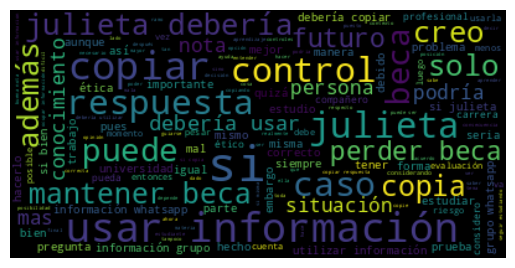

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))

## Análisis exploratorio

---

In [9]:
from utils.preprocesamiento import delete_non_string_rows

df = delete_non_string_rows(df,'comment')

0 rows found with non string elements for column comment


In [10]:
from utils.exploracion import comment_length

lengths = comment_length(df,'comment')
lengths_nsw = comment_length(df,'comment',ignore=stopwords.words('spanish'))

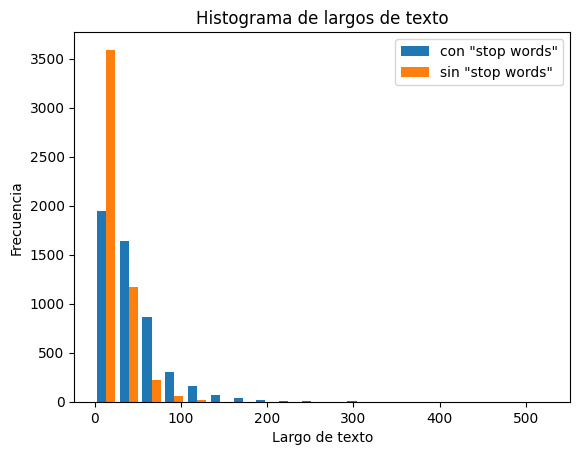

In [11]:
import matplotlib.pyplot as plt

plt.hist([lengths, lengths_nsw], bins=20, color=['tab:blue', 'tab:orange'], label=['con "stop words"', 'sin "stop words"'])

plt.xlabel('Largo de texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de largos de texto')
plt.legend()
plt.show()

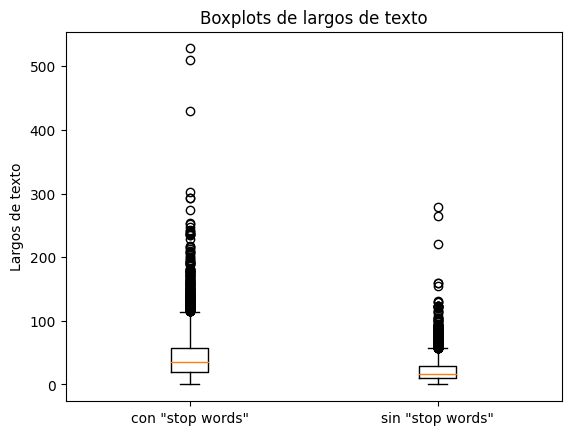

In [12]:
fig, ax = plt.subplots()
ax.boxplot([lengths, lengths_nsw])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['con "stop words"', 'sin "stop words"'])
ax.set_title('Boxplots de largos de texto')
plt.show()

In [13]:
import numpy as np

from utils.exploracion import basic_stats, print_basic_stats

In [14]:
print('Con "stop words"')
print_basic_stats(lengths)
print('\nSin "stop words"')
print_basic_stats(lengths_nsw)

Con "stop words"
Media: 43.65283540802213
Desviación estándar: 36.52828433655485
Mediana: 35.0
Mínimo: 1
Máximo: 528

Sin "stop words"
Media: 22.07705986959099
Desviación estándar: 18.34507507803722
Mediana: 17.0
Mínimo: 0
Máximo: 279


---

Condicionamiento por valor seleccionado

In [15]:
df['sel'].value_counts()

5    1170
6    1145
4    1037
3     896
2     519
1     217
7      77
Name: sel, dtype: int64

Se observan valores fuera de rango, por el momento se eliminarán estos valores

In [16]:
df = df.drop(df[df['sel'] > 6].index)

In [17]:
toks_1 = most_common(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish')+['si','julieta'])
toks_2 = most_common(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish')+['si','julieta'])
toks_3 = most_common(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish')+['si','julieta'])
toks_4 = most_common(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish')+['si','julieta'])
toks_5 = most_common(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish')+['si','julieta'])
toks_6 = most_common(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish')+['si','julieta'])

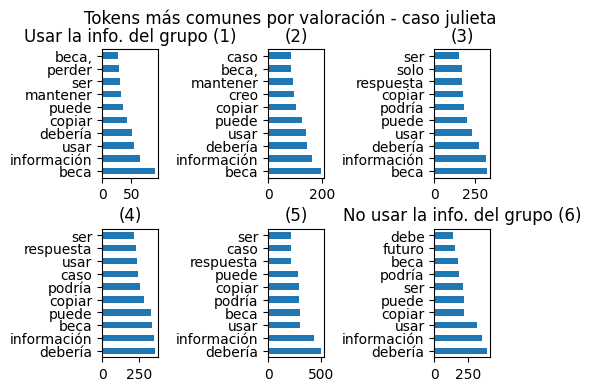

In [18]:
fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(wspace=2, hspace=0.4)

plot_token_frequency(toks_1,'Usar la info. del grupo (1)',ax=axs[0,0])
plot_token_frequency(toks_2,'(2)',ax=axs[0,1])
plot_token_frequency(toks_3,'(3)',ax=axs[0,2])
plot_token_frequency(toks_4,'(4)',ax=axs[1,0])
plot_token_frequency(toks_5,'(5)',ax=axs[1,1])
plot_token_frequency(toks_6,'No usar la info. del grupo (6)',ax=axs[1,2])
fig.suptitle("Tokens más comunes por valoración - caso {}".format(caso));

In [19]:
lengths_1 = comment_length(df[df['sel'] == 1],'comment',ignore=stopwords.words('spanish'))
lengths_2 = comment_length(df[df['sel'] == 2],'comment',ignore=stopwords.words('spanish'))
lengths_3 = comment_length(df[df['sel'] == 3],'comment',ignore=stopwords.words('spanish'))
lengths_4 = comment_length(df[df['sel'] == 4],'comment',ignore=stopwords.words('spanish'))
lengths_5 = comment_length(df[df['sel'] == 5],'comment',ignore=stopwords.words('spanish'))
lengths_6 = comment_length(df[df['sel'] == 6],'comment',ignore=stopwords.words('spanish'))

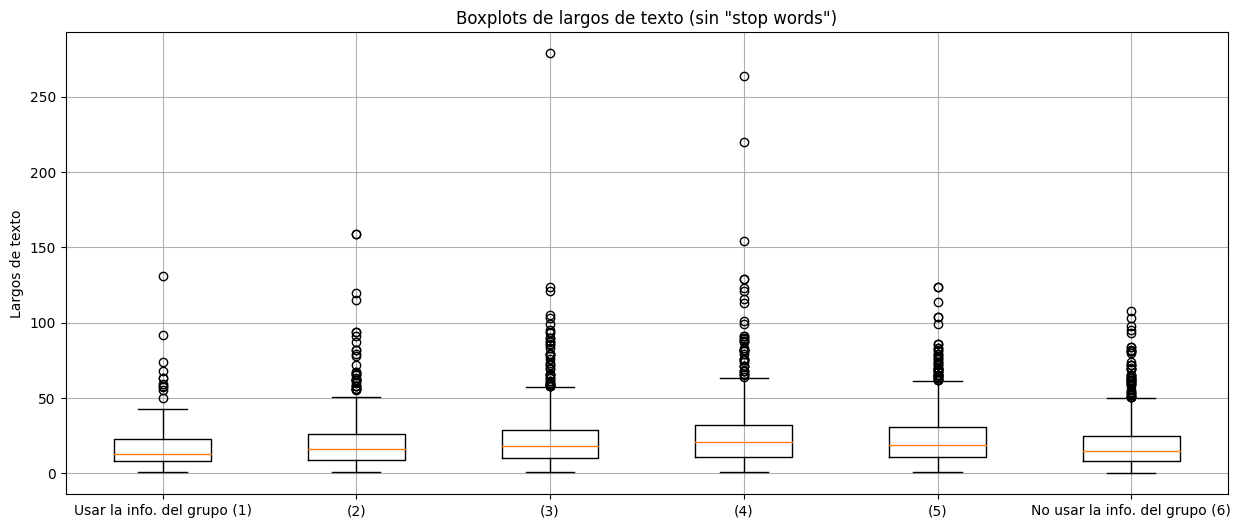

In [20]:
plt.rcParams["figure.figsize"] = (15,6)
fig, ax = plt.subplots()
ax.boxplot([lengths_1, lengths_2, lengths_3, lengths_4, lengths_5, lengths_6])
ax.set_ylabel('Largos de texto')
ax.set_xticklabels(['Usar la info. del grupo (1)', '(2)', '(3)', '(4)', '(5)', 'No usar la info. del grupo (6)'])
ax.set_title('Boxplots de largos de texto (sin "stop words")')
plt.grid()
plt.show()

In [21]:
from utils.exploracion import print_table_md

dic = basic_stats(lengths_1)

# headers = ['valoración'] + list(dic.keys())
headers = ['valoración', 'media', 'mediana', 'desviación estándar', 'mínimo', 'máximo']
data = [['(1)'] + list(dic.values())]
data.append(['(2)'] + list(basic_stats(lengths_2).values()))
data.append(['(3)'] + list(basic_stats(lengths_3).values()))
data.append(['(4)'] + list(basic_stats(lengths_4).values()))
data.append(['(5)'] + list(basic_stats(lengths_5).values()))
data.append(['(6)'] + list(basic_stats(lengths_6).values()))

print_table_md(headers, data)

| valoración | media | mediana | desviación estándar | mínimo | máximo |
| --- | --- | --- | --- | --- | --- |
| (1) | 18.170506912442395 | 13.0 | 16.271698203194738 | 1 | 131 |
| (2) | 20.897880539499038 | 16.0 | 19.028808282202938 | 1 | 159 |
| (3) | 22.6484375 | 18.0 | 19.57381455691746 | 1 | 279 |
| (4) | 25.161041465766633 | 21.0 | 21.205112692828163 | 1 | 264 |
| (5) | 23.157264957264957 | 19.0 | 16.794765750736307 | 1 | 124 |
| (6) | 19.015720524017468 | 15.0 | 15.239735382365183 | 0 | 108 |


---

### Condicionamiento por fases

In [22]:
df['phase'].value_counts()

1    1770
3     766
2     761
4     755
5     750
6     182
Name: phase, dtype: int64

In [1]:
from utils.cargar import datamap

In [2]:
datamap

{'parent': 'datos_EthicApp/',
 'laura': ['2020.CD2201'],
 'julieta': ['2021.CD1100'],
 'alicia': ['2021.CD1201', '2022.CD1100'],
 'adela': ['2021.CD2201', '2022.CD1201'],
 'laura_fases': {'2020.CD2201': {'Ind1': [None],
   'Grup': [None],
   'Ind2': [None]}},
 'julieta_fases': {'2021.CD1100': {'Ind1': [3], 'Grup': [4], 'Ind2': [5]}},
 'alicia_fases': {'2021.CD1201': {'Ind1': [1, 2],
   'Grup': [3, 4],
   'Ind2': [5, 6]},
  '2022.CD1100': {'Ind1': [2], 'Grup': [3], 'Ind2': [4]}},
 'adela_fases': {'2021.CD2201': {'Ind1': [1, 2],
   'Grup': [3, 4],
   'Ind2': [5, 6]},
  '2022.CD1201': {'Ind1': [2], 'Grup': [3], 'Ind2': [4]}}}

In [3]:
from utils.cargar import df_caso

caso = 'julieta'
df = df_caso(caso)
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time,curso
id,,,,,,,,,,,,,
11511,2695,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Si estudiaste y sabes hacer los ejercicios ¿pa...,1,2021-05-19T02:23:09.528Z,2021.CD1100
11515,2702,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,5,No debería usar la información ya que no es co...,1,2021-05-19T02:49:39.214Z,2021.CD1100
11516,2701,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,4,si es que no sabe realizar la pregunta puede r...,1,2021-05-19T02:49:40.029Z,2021.CD1100
11517,2700,NaN,F,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,3,lamentablemente este pais es muy injusto y la ...,1,2021-05-19T02:53:11.462Z,2021.CD1100
11519,2707,NaN,M,1,[Proporcione argumentos para justificar su res...,Usar la información del grupo de WhatsApp,No usar la información del grupo de WhatsApp,6,6,Considerando que Julieta pudo optar por una be...,1,2021-05-19T03:16:45.404Z,2021.CD1100


In [4]:
from utils.cargar import fase

df = fase(df,'Ind1',caso)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().